<a href="https://colab.research.google.com/github/Inchara97/Anomaly-Detection-/blob/main/DisasterManagement_SWARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detected bounding boxes with confidence > 0.50:
Box 1: (199, 117, 225, 174) | Confidence: 1.00
Box 2: (201, 55, 217, 103) | Confidence: 1.00
Box 3: (100, 133, 133, 173) | Confidence: 1.00
Box 4: (143, 89, 171, 137) | Confidence: 0.99
Box 5: (243, 43, 267, 94) | Confidence: 0.95
Box 6: (284, 83, 290, 122) | Confidence: 0.55
Box 7: (2, 163, 22, 174) | Confidence: 0.50


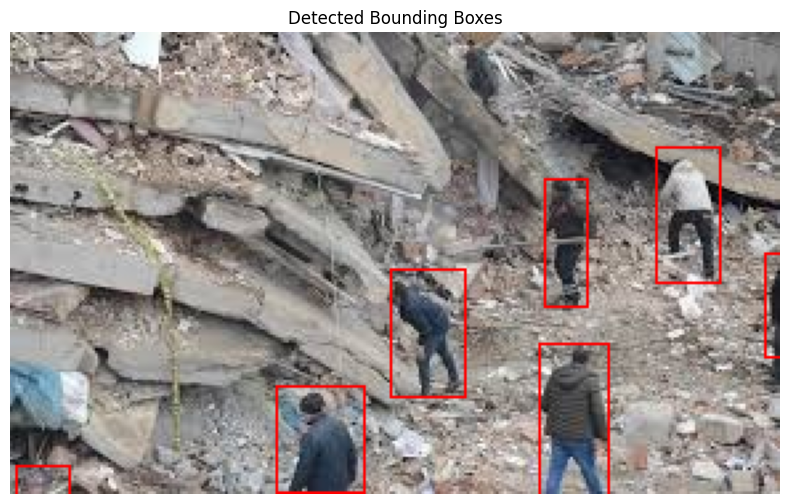

In [13]:
# ✅ Step 1: Install dependencies (already installed in your case)
# !pip install torch torchvision opencv-python matplotlib

# ✅ Step 2: Imports
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 3: Load the pretrained model architecture
model = fasterrcnn_resnet50_fpn(pretrained=False, num_classes=2)  # Assuming 2 classes: background + person

# ✅ Step 4: Load your custom trained weights
model.load_state_dict(torch.load("/content/Human_Detection_DroneImagery.pth", map_location="cpu"))
model.eval()

# ✅ Step 5: Load and preprocess your image
img = cv2.imread("/content/Image3.jpeg")  # ← Replace with your image name
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = T.Compose([T.ToTensor()])
input_tensor = transform(img_rgb).unsqueeze(0)

# ✅ Step 6: Inference
with torch.no_grad():
    predictions = model(input_tensor)

# ✅ Step 7: Draw predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']

threshold = 0.5  # Confidence threshold
print("Detected bounding boxes with confidence > {:.2f}:".format(threshold))
for i, (box, score) in enumerate(zip(boxes, scores)):
    if score > threshold:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 1)  # Thin line
        print(f"Box {i+1}: ({x1}, {y1}, {x2}, {y2}) | Confidence: {score:.2f}")

# ✅ Step 6: Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Detected Bounding Boxes")
plt.axis("off")
plt.show()

Detected bounding boxes with confidence > 0.50:
Box 1: (615, 229, 641, 276) | Confidence: 1.00
Box 2: (473, 56, 486, 85) | Confidence: 1.00
Box 3: (913, 96, 940, 135) | Confidence: 0.99
Box 4: (830, 317, 863, 366) | Confidence: 0.99
Box 5: (708, 494, 757, 538) | Confidence: 0.99
Box 6: (24, 201, 52, 241) | Confidence: 0.99
Box 7: (532, 131, 547, 168) | Confidence: 0.99
Box 8: (494, 506, 552, 539) | Confidence: 0.99
Box 9: (460, 234, 490, 276) | Confidence: 0.99
Box 10: (458, 42, 469, 71) | Confidence: 0.99
Box 11: (257, 324, 298, 379) | Confidence: 0.98
Box 12: (771, 218, 789, 258) | Confidence: 0.98
Box 13: (685, 225, 705, 262) | Confidence: 0.97
Box 14: (909, 474, 960, 538) | Confidence: 0.97
Box 15: (373, 70, 384, 98) | Confidence: 0.97
Box 16: (124, 238, 153, 282) | Confidence: 0.96
Box 17: (87, 370, 130, 413) | Confidence: 0.96
Box 18: (581, 180, 599, 226) | Confidence: 0.96
Box 19: (213, 266, 242, 311) | Confidence: 0.96
Box 20: (0, 208, 26, 245) | Confidence: 0.95
Box 21: (789, 

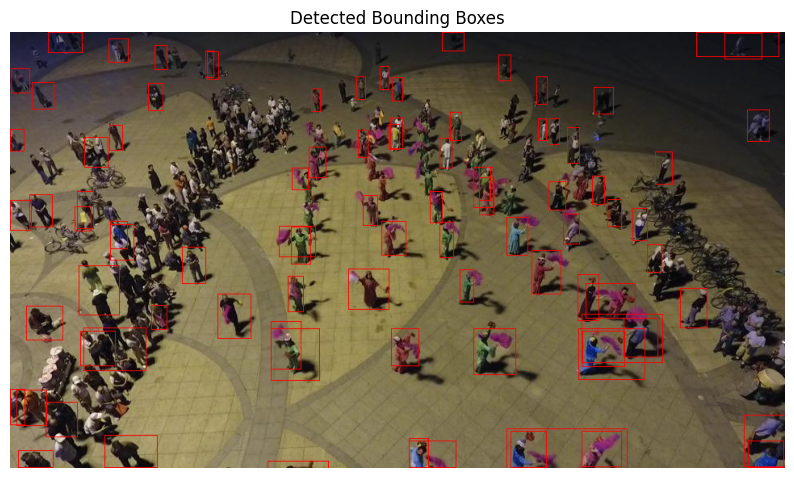

In [24]:
img = cv2.imread("/content/0000037_01494_d_0000052.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = T.Compose([T.ToTensor()])
input_tensor = transform(img_rgb).unsqueeze(0)

# ✅ Step 6: Inference
with torch.no_grad():
    predictions = model(input_tensor)

# ✅ Step 7: Draw predictions
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']

threshold = 0.5  # Confidence threshold
print("Detected bounding boxes with confidence > {:.2f}:".format(threshold))
for i, (box, score) in enumerate(zip(boxes, scores)):
    if score > threshold:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 1)  # Thin line
        print(f"Box {i+1}: ({x1}, {y1}, {x2}, {y2}) | Confidence: {score:.2f}")

# ✅ Step 6: Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Detected Bounding Boxes")
plt.axis("off")
plt.show()